In [1]:
import pandas as pd
import numpy as np
import os
import skimage
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
filenames = os.listdir('../dataset/Ungrouped/')

categories = []
for filename in filenames:
    category = filename.split(' ')[0]
    if category == 'a': 
        categories.append(0)  
    elif category == 'b': 
        categories.append(1)
    elif category == 'ba':
        categories.append(2)
    elif category == 'be_bi':
        categories.append(3)
    elif category == 'bo_bu':
        categories.append(4)
    elif category == 'd_r': 
        categories.append(5)
    elif category == 'da':
        categories.append(6)
    elif category == 'de_di':
        categories.append(7)
    elif category == 'do_du':
        categories.append(8)
    elif category == 'e_i': 
        categories.append(9)
    elif category == 'g':
        categories.append(10)
    elif category == 'ga':
        categories.append(11)
    elif category == 'ge_gi':
        categories.append(12)
    elif category == 'go_gu': 
        categories.append(13)
    elif category == 'h':
        categories.append(14)
    elif category == 'ha':
        categories.append(15)
    elif category == 'he_hi':
        categories.append(16)
    elif category == 'ho_hu': 
        categories.append(17)
    elif category == 'k':
        categories.append(18)
    elif category == 'ka':
        categories.append(19)
    elif category == 'ke_ki':
        categories.append(20)
    elif category == 'ko_ku': 
        categories.append(21)
    elif category == 'l':
        categories.append(22)
    elif category == 'la':
        categories.append(23)
    elif category == 'le_li':
        categories.append(24)
    elif category == 'lo_lu': 
        categories.append(25)
    elif category == 'm':
        categories.append(26)
    elif category == 'ma':
        categories.append(27)
    elif category == 'me_mi':
        categories.append(28)
    elif category == 'mo_mu': 
        categories.append(29)
    elif category == 'n':
        categories.append(30)
    elif category == 'na':
        categories.append(31)
    elif category == 'ne_ni':
        categories.append(32)
    elif category == 'no_nu':
        categories.append(33)
    elif category == 'ng': 
        categories.append(34)
    elif category == 'nga':
        categories.append(35)
    elif category == 'nge_ngi':
        categories.append(36)
    elif category == 'ngo_ngu': 
        categories.append(37)
    elif category == 'o_u':
        categories.append(38)
    elif category == 'p':
        categories.append(39)
    elif category == 'pa':
        categories.append(40)
    elif category == 'pe_pi': 
        categories.append(41)
    elif category == 'po_pu':
        categories.append(42)
    elif category == 's':
        categories.append(43)
    elif category == 'sa':
        categories.append(44)
    elif category == 'se_si': 
        categories.append(45)
    elif category == 'so_su':
        categories.append(46)
    elif category == 't':
        categories.append(47)
    elif category == 'ta':
        categories.append(48)   
    elif category == 'te_ti': 
        categories.append(49)
    elif category == 'to_tu':
        categories.append(50)
    elif category == 'w':
        categories.append(51)
    elif category == 'wa':
        categories.append(52)
    elif category == 'we_wi': 
        categories.append(53)
    elif category == 'wo_wu':
        categories.append(54)
    elif category == 'y':
        categories.append(55)
    elif category == 'ya':
        categories.append(56)
    elif category == 'ye_yi': 
        categories.append(57)
    elif category == 'yo_yu':
        categories.append(58)
        
df = pd.DataFrame({'filename': filenames, 'letter': categories})

In [3]:
df["letter"] = df["letter"].replace({ 0:'a',1:'b', 2:'ba',3:'bi',4:'bo',5:'d',6:'da',7:'di',8:'do',9:'e',10:'g',
                                         11:'ga',12:'gi',13:'gu',14:'h',15:'ha',16:'hi',17:'ho',18:'k',19:'ka',20:'ki',
                                         21:'ko',22:'l',23:'la',24:'li',25:'lu',26:'m',27:'ma',28:'mi',29:'mu',30:'n',
                                         31:'na',32:'ni',33:'no',34:'ng',35:'nga',36:'ngi',37:'ngu',38:'o',39:'p',40:'pa',
                                         41:'pi',42:'pu',43:'s',44:'sa',45:'si',46:'su',47:'t',48:'ta',49:'ti',50:'tu',
                                         51:'w',52:'wa',53:'wi',54:'wo',55:'y',56:'ya',57:'ye',58:'yo'})

In [4]:
IMAGE_PATH = '../dataset/Ungrouped/'
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_CHANNELS = 1
RANDOM_STATE = 42
TEST_SIZE = 0.2
VAL_SIZE = 0.2
CONV_2D_DIM_1 = 16
CONV_2D_DIM_2 = 16
CONV_2D_DIM_3 = 32
CONV_2D_DIM_4 = 64
MAX_POOL_DIM = 2
KERNEL_SIZE = 3
BATCH_SIZE = 32
NO_EPOCHS = 5
DROPOUT_RATIO = 0.5
PATIENCE = 5
VERBOSE = 1

In [5]:
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=df["letter"])

In [6]:
train_df, val_df = train_test_split(train_df, test_size=.3, random_state=RANDOM_STATE, stratify=train_df["letter"])

In [7]:
print("Train set rows: {}".format(train_df.shape[0]))
print("Val   set rows: {}".format(val_df.shape[0]))
print("Test  set rows: {}".format(test_df.shape[0]))

Train set rows: 33040
Val   set rows: 14160
Test  set rows: 11800


In [8]:
def read_image(file_name):
    image = skimage.io.imread(IMAGE_PATH + file_name)
    image = skimage.transform.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT, 1), mode='reflect')
    return image[:,:,:]

In [9]:
def categories_encoder(dataset, var='letter'):
    X = np.stack(dataset['filename'].apply(read_image))
    y = pd.get_dummies(dataset[var], drop_first=False)
    return X, y

In [ ]:
X_train, y_train = categories_encoder(train_df)
X_val, y_val = categories_encoder(val_df)
X_test, y_test = categories_encoder(test_df)

In [ ]:
# baybayin_recognition_model = Sequential()
# baybayin_recognition_model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation ='relu', input_shape = (32,32,1)))
# baybayin_recognition_model.add(Conv2D(filters = 32, kernel_size = (3,3), padding  = 'Same', activation ='relu'))
# baybayin_recognition_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# baybayin_recognition_model.add(Dropout(0.2))

# baybayin_recognition_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding  = 'Same', activation ='relu'))
# baybayin_recognition_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding  = 'Same', activation ='relu'))
# baybayin_recognition_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# baybayin_recognition_model.add(Dropout(0.2))

# baybayin_recognition_model.add(Conv2D(filters = 128, kernel_size = (3,3), padding  = 'Same', activation ='relu'))
# baybayin_recognition_model.add(Conv2D(filters = 128, kernel_size = (3,3), padding  = 'Same', activation ='relu'))
# baybayin_recognition_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# baybayin_recognition_model.add(Dropout(0.2))

# baybayin_recognition_model.add(Flatten())
# baybayin_recognition_model.add(Dense(216, activation = "relu"))
# baybayin_recognition_model.add(Dropout(0.2))
# baybayin_recognition_model.add(Dense(512, activation = "relu"))
# baybayin_recognition_model.add(Dropout(0.5))
# baybayin_recognition_model.add(Dense(59, activation = "softmax"))

# baybayin_recognition_model.summary()

model=Sequential()
model.add(Conv2D(CONV_2D_DIM_1, kernel_size=KERNEL_SIZE, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT,IMAGE_CHANNELS), activation='relu', padding='same'))
model.add(Conv2D(CONV_2D_DIM_2, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(MaxPool2D(MAX_POOL_DIM))
model.add(Dropout(DROPOUT_RATIO))
model.add(Conv2D(CONV_2D_DIM_2, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(Conv2D(CONV_2D_DIM_2, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(Dropout(DROPOUT_RATIO))
model.add(Flatten())
model.add(Dense(y_train.columns.size, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
#callbacks
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
baybayin_recognition_model.compile(loss="categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('BRM.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.99 ** (x+NO_EPOCHS))
earlystopper = EarlyStopping(monitor='loss', patience=PATIENCE, verbose=VERBOSE)
checkpointer = ModelCheckpoint('BRM.h5',
                                monitor='val_accuracy',
                                verbose=VERBOSE,
                                save_best_only=True,
                                save_weights_only=True)

In [ ]:
# from timeit import default_timer as timer

# class TimingCallback(keras.callbacks.Callback):
#     def __init__(self, logs={}):
#         self.logs=[]
#     def on_epoch_begin(self, epoch, logs={}):
#         self.starttime = timer()
#     def on_epoch_end(self, epoch, logs={}):
#         self.logs.append(timer()-self.starttime)

# cb = TimingCallback()

In [ ]:
# history = baybayin_recognition_model.fit(train_generator,validation_data=validation_generator,
#                                          validation_steps=total_validate/64,
#                                          steps_per_epoch=total_train/64,epochs=5,
#                                          callbacks=[learning_rate_reduction, es, mc,cb])

train_model  = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=20,
                  verbose=1,
                  validation_data=(X_val, y_val),
                  callbacks=[earlystopper, checkpointer, annealer])

In [ ]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    #define the traces
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    #add traces to the figure
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    #set the layout for the figure
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])
    #plot
    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(train_model)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
def test_accuracy_report(model):
    predicted = model.predict(X_test)
    test_predicted = np.argmax(predicted, axis=1)
    test_truth = np.argmax(y_test.values, axis=1)
    print(metrics.classification_report(test_truth, test_predicted, target_names=y_test.columns)) 
    test_res = model.evaluate(X_test, y_test.values, verbose=0)
    print('Loss function: %s, accuracy:' % test_res[0], test_res[1])

In [ ]:
test_accuracy_report(model)

In [3]:
prediction_try = "pagsamu"

In [21]:
from tensorflow.keras.models import load_model
model = load_model('../Detection/BRM.h5')
def get_predictions(X_test):
    # Digits prediction

    predictions = model.predict(X_test)    
    predictions = np.argmax(predictions, axis=1)
    
    return predictions

In [12]:
def plot_images_sample(X, Y):
    # Draw plot for images sample
    
    plt.figure(figsize=(10,10))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        plt.xlabel(Y[index])
    plt.show()

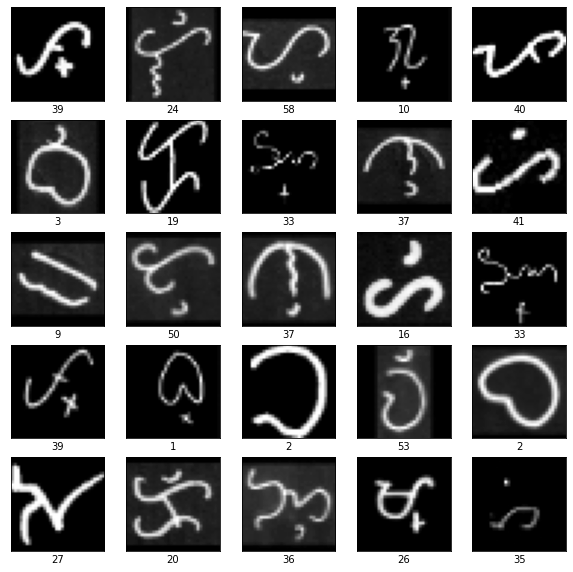

In [13]:
# Prediction and display it
predictions = get_predictions(X_test)
plot_images_sample(X_test, predictions)

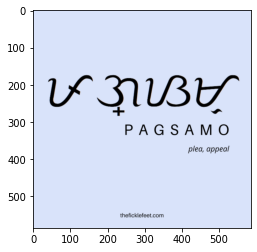

In [12]:
import cv2
image_file = '../OCR dataset/14.png'
image_test = cv2.imread(image_file)
plt.imshow(image_test)
plt.show()

In [13]:
def digits_finder(image_file: str, erode_kernel=48, threshold_basic=100, out_size=32):
    # Find digits on the image_file and transform it to [-1, out_size, out_size, 1]
    
    image_test = cv2.imread(image_file)
    gray_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray_test, threshold_basic, 255, cv2.THRESH_BINARY)
    image_erode = cv2.erode(thresh, np.ones((erode_kernel, erode_kernel), np.uint8), iterations=1)

    # Find contours
    contours, hierarchy = cv2.findContours(image_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    output = image_erode.copy()

    digits = []
    j = 0
    labels = []
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        #if (hierarchy[0][idx][3] == 0):
        if (hierarchy[0][idx][3] == 0) and (w*h>3000):
            cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
            digit_crop = image_erode[y:y + h, x:x + w]

            # Resize digit canvas to square
            size_max = max(w, h)
            print(j, w*h)
            digit_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
            if w > h:
                y_pos = size_max//2 - h//2
                digit_square[y_pos:y_pos + h, 0:w] = digit_crop
            elif w < h:
                x_pos = size_max//2 - w//2
                digit_square[0:h, x_pos:x_pos + w] = digit_crop
            else:
                digit_square = digit_crop
            
            # Resize digit to 28x28 and add digit and its X-coordinate
            digits.append((x,(cv2.resize(digit_square, (out_size, out_size), interpolation=cv2.INTER_AREA))))
            labels.append(str(j))
            j += 1
            

    # Sort array in place by X-coordinate
    digits.sort(key=lambda x: x[0], reverse=False)
    
    # Tranform digits to tensor
    digits_new =[]
    for i in range(len(digits)):
        digits_new.append(digits[i][1])
    digits_res = np.reshape(digits_new, (j, 32, 32, 1))
    digits_res = np.where(digits_res > 225, 255, digits_res)
    digits_res = np.where(digits_res < 125, 0, digits_res)

    return digits_res, labels

In [14]:
X_user_test, Y_user_test = digits_finder(image_file, erode_kernel=3, threshold_basic=100)

0 10947
1 10824
2 13786
3 10947


In [15]:
def plot_images_test(X, Y):
    # Draw plot for images sample
    
    plt.figure(figsize=(10,10))
    plt.gray()
    for i in range(len(Y)):        
        plt.subplot(1,len(Y),i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.squeeze(X[i]))
        plt.xlabel(Y[i])
    plt.show()

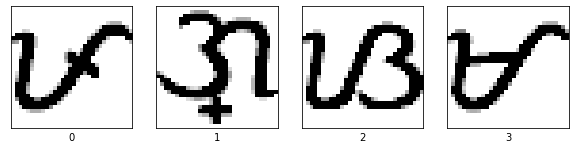

In [16]:
plot_images_test(X_user_test, Y_user_test)

In [17]:
def fe_data(df, target):
    # FE: scaling data ant transform target to categorical
    df = df / 255.
    target = to_categorical(target)
    return df, target

In [18]:
X_user_test, Y_user_test = fe_data(X_user_test, Y_user_test)

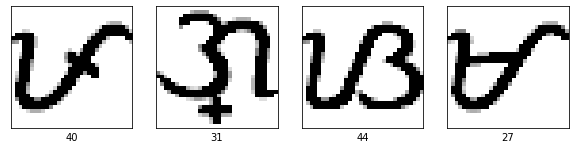

In [22]:
predictions_user = get_predictions(X_user_test)
plot_images_test(X_user_test, predictions_try)

In [48]:
print(prediction_try)

pagsamu


In [1]:
with open("../Translation/Tagalog Words.txt") as v:
    text = v.read()
    # To separate the 10,000 word list into separate strings
    # Note: can replace this txt with better list for better results
    words = text.splitlines()

In [2]:
words

['ko',
 'ng',
 'mga',
 'isa',
 'kaunti',
 'tambak',
 'kaunti',
 'tungkod',
 'mga',
 'itaas',
 'na-igsian',
 'magpapawalang-bisa',
 'ngilin',
 'pangingilin',
 'kasangguni',
 'sumang-ayon',
 'sumama',
 'gawin',
 'katumpakin',
 'sakit',
 'sumang-ayon',
 'bulon',
 'matindi',
 'direksiyon',
 'pinagbabalaan',
 'kalamganan',
 'lamang',
 'pagkamagalang',
 'pagkukunwari',
 'magdikit',
 'takot',
 'pagkatapos',
 'hapon',
 'pagkatapos',
 'muli',
 'laban',
 'edad',
 'nang-aapi',
 'pumayag',
 'hangin',
 'eroplano',
 'mahangin',
 'magkatulad',
 'pareho',
 'lahat',
 'bawa',
 'payagan',
 'sige',
 'halos',
 'nagiisa',
 'na',
 'din',
 'man',
 'rin',
 'rin',
 'lagi',
 'at',
 'bingwit',
 'saka',
 'ihit',
 'galit',
 'hayop',
 'magdugtong',
 'tangkil',
 'tarka',
 'iba',
 'saka na',
 'sagot',
 'langgam',
 'nulo',
 'anyo',
 'daong',
 'armas',
 'dakipin',
 'dating',
 'palaso',
 'pintor',
 'ano',
 'singlapad',
 'tumaas',
 'tulog',
 'paniniyak',
 'kahit',
 'dumalo',
 'halina',
 'awditoryum',
 'idinadagdag',
 'kot

In [4]:
import jellyfish

In [5]:
def word_corrector(word,words_list):
  # creating a dictionnary where keys are words from words_list and values are levenshtein distance between key and word
  dict_distances = {i:jellyfish.levenshtein_distance(word,i) for i in words_list}

  # we return then the key with the lower value corresponding the the closest to word in terms of levenstein distance
  return min(dict_distances, key=dict_distances.get)

In [6]:
word_corrector(prediction_try,words)

'pagsama'

In [7]:
def word_corrector_v3(word, words_list,threshold):
  # creating a dictionnary where keys are words from words_list and values are levenshtein distance between key and word
  dict_distances = {i:jellyfish.levenshtein_distance(word,i) for i in words_list if jellyfish.levenshtein_distance(word,i)<threshold}

  return sorted(dict_distances,key = dict_distances.get)

In [8]:
word_corrector_v3(prediction_try,words,2)

['pagsama', 'pagsamo']

In [47]:
# 0:'a',1:'b', 2:'ba',3:'be_bi',4:'bo_bu',5:'d_r',6:'da',7:'de_di',8:'do_du',9:'e_i',10:'g',
# 11:'ga',12:'ge_gi',13:'go_gu',14:'h',15:'ha',16:'he_hi',17:'ho_hu',18:'k',19:'ka',20:'ke_ki',
# 21:'ko_ku',22:'l',23:'la',24:'le_li',25:'lo_lu',26:'m',27:'ma',28:'me_mi',29:'mo_mu',30:'n',
# 31:'na',32:'ne_ni',33:'no_nu',34:'ng',35:'nga',36:'nge_ngi',37:'ngo_ngu',38:'o_u',39:'p',40:'pa',
# 41:'pe_pi',42:'po_pu',43:'s',44:'sa',45:'se_si',46:'so_su',47:'t',48:'ta',49:'te_ti',50:'to_tu',
# 51:'w',52:'wa',53:'we_wi',54:'wo_wu',55:'y',56:'ya',57:'ye_yi',58:'yo_yu'

In [ ]:
# def pred_wrong_display_for_user_dataset(X_test, predictions, y_test):
#     # Displays misclassified digits from user's dataset
    
#     X_test_wrong = []
#     predictions_wrong = []
#     Y_test_pred = []
#     for i in range(len(X_test)):
#         Y_test_pred.append(np.argmax(y_test[i]))
#         if predictions[i] != Y_test_pred[i]:
#             #print(i, predictions[i], Y_test_pred[i])
#             X_test_wrong.append(X_test[i])
#             predictions_wrong.append(predictions[i])

#     plot_images_test(X_test_wrong, predictions_wrong)
        
#     print('Accuracy is', round(accuracy_score(Y_test_pred, predictions),3))
    
#     return Y_test_pred

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# Y_user_test_pred = pred_wrong_display_for_user_dataset(X_user_test, predictions_user, Y_user_test)